In [1]:
%reset -f
import sys
sys.path.insert(0, "..")
from wavhandler import *
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, make_scorer, log_loss
from utils_train import *
import deepdish as dd
from configs import DatasetConfiguration
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
from utils import *

splitting = 'custom'
data_setting = 'rawflt'
model_setting = 'conv1d'
clean=True
csvpath = f"{TEMP_DATADIR}/df_{model_setting}_{data_setting}_{splitting}.csv"

## Model loading (Flynet)

In [9]:
traincf = TrainConfiguration(nb_classes=3, setting=data_setting, model_name=f"Flies_{data_setting}_{model_setting}_{splitting}", monitor='val_accuracy')
modelconf = ModelConfiguration(model_setting=model_setting, data_setting=data_setting, nb_classes=3)
model = modelconf.config
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

############ INPUT SHAPE:(5000, 1)


In [10]:
model.load_weights(f"{TEMP_DATADIR}/Flies_{data_setting}_{model_setting}_{splitting}.h5")

In [11]:
csvpath = f"{TEMP_DATADIR}/df_{model_setting}_{data_setting}_{splitting}.csv"
sub = pd.read_csv(csvpath, index_col=None)

In [12]:
missed = sub[sub.labels != sub.preds]
true_suz_pred_mel = sub[(sub.labels==1) & (sub.preds==0)]
true_mel_pred_mel = sub[(sub.labels==0) & (sub.preds==0)]
true_suz_pred_suz = sub[(sub.labels==1) & (sub.preds==1)]

In [17]:
def extract_features(fnames, labels, traincf):
    return model.predict(valid_generator(fnames, 
                                         labels,
                                         batch_size=traincf.batch_size,
                                         target_names=[0,1,2],
                                         setting=traincf.setting,
                                         preprocessing_train_stats=''),
                         steps=int(math.ceil(float(len(fnames))/float(traincf.batch_size))))

In [56]:
df = true_suz_pred_mel
pred_missed = extract_features(df.fnames.tolist(), df.labels.tolist(), traincf)

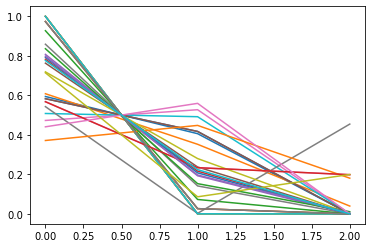

In [57]:
for i in range(30):
    rdm = np.random.randint(0,pred_missed.shape[0])
    plt.plot(pred_missed[rdm])

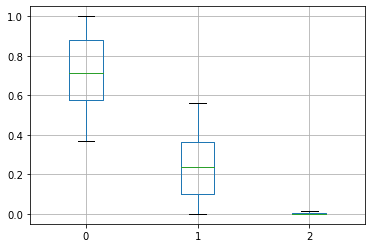

In [72]:
pd.DataFrame(np.round(pred_missed, decimals=4)).boxplot(showfliers=False)

(array([258.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

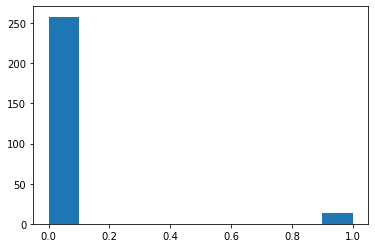

In [62]:
plt.hist(np.argmax(pred_missed, axis=1))